# Purpose
* gather appropriate negative class dataset for aki admission
* 1 day - 5 day data saved in diffrent files
* the goal is to merge the lab and vital datasets without duplicating patients

In [82]:
import pandas as pd
lab_5days = pd.read_csv('../data/intermediate/negative_lab_summary_5days.csv', header=None)
vital_5days = pd.read_csv('../data/intermediate/vitalperiodic_5days.csv', header=None)
print(len(lab_5days))
print(len(vital_5days))

359801
15383


In [83]:
import sys, os
sys.path.insert(0, os.path.abspath('../src/'))
import cleaning_funcs
import importlib
importlib.reload(cleaning_funcs)
# process dataframes, name columns, merge and filter
lab_5days = cleaning_funcs.lab_process(lab_5days) 
vital_5days = cleaning_funcs.vital_process(vital_5days, 5)
print(len(lab_5days))
print(len(vital_5days))
combined_5days, index_5days = cleaning_funcs.merge_filter(lab_5days, vital_5days)
print(len(combined_5days))

15466
15383
15345


In [84]:
importlib.reload(cleaning_funcs)
lab_4days = pd.read_csv('../data/intermediate/negative_lab_summary_4days.csv', header=None)
vital_4days = pd.read_csv('../data/intermediate/vitalperiodic_4days.csv', header=None)
lab_4days = cleaning_funcs.lab_process(lab_4days) 
vital_4days = cleaning_funcs.vital_process(vital_4days, 4)
print(len(lab_4days))
print(len(vital_4days))
# exclude patients already in 5 day list
lab_4days, vital_4days = cleaning_funcs.filter_nextday_patients(lab_4days, vital_4days, index_5days)
combined_4days, index_4days = cleaning_funcs.merge_filter(lab_4days, vital_4days)
# add indices
index_4days = index_4days+index_5days
print(len(combined_4days))

21347
21217
5824


In [85]:
lab_3days = pd.read_csv('../data/intermediate/negative_lab_summary_3days.csv', header=None)
vital_3days = pd.read_csv('../data/intermediate/vitalperiodic_3days.csv', header=None)
lab_3days = cleaning_funcs.lab_process(lab_3days) 
vital_3days = cleaning_funcs.vital_process(vital_3days, 3)
print(len(lab_3days))
print(len(vital_3days))
# exclude patients already in 4 and 5 day list
lab_3days, vital_3days = cleaning_funcs.filter_nextday_patients(lab_3days, vital_3days, index_4days)
combined_3days, index_3days = cleaning_funcs.merge_filter(lab_3days, vital_3days)
# add indices
index_3days = index_3days+index_4days
print(len(combined_3days))

31352
31187
9932


In [86]:
lab_2days = pd.read_csv('../data/intermediate/negative_lab_summary_2days.csv', header=None)
vital_2days = pd.read_csv('../data/intermediate/vitalperiodic_2days.csv', header=None)
lab_2days = cleaning_funcs.lab_process(lab_2days) 
vital_2days = cleaning_funcs.vital_process(vital_2days, 2)
print(len(lab_2days))
print(len(vital_2days))
# exclude patients already in 3, 4 and 5 day list
lab_2days, vital_2days = cleaning_funcs.filter_nextday_patients(lab_2days, vital_2days, index_3days)
combined_2days, index_2days = cleaning_funcs.merge_filter(lab_2days, vital_2days)
# add indices
index_2days = index_2days+index_3days
print(len(combined_2days))

49842
49715
18362


In [87]:
lab_1days = pd.read_csv('../data/intermediate/negative_lab_summary_1day.csv', header=None)
vital_1days = pd.read_csv('../data/intermediate/vitalperiodic_1day.csv', header=None)
lab_1days = cleaning_funcs.lab_process(lab_1days) 
vital_1days = cleaning_funcs.vital_process(vital_1days, 1)
print(len(lab_1days))
print(len(vital_1days))
# exclude patients already in 2, 3, 4 and 5 day list
lab_1days, vital_1days = cleaning_funcs.filter_nextday_patients(lab_1days, vital_1days, index_2days)
combined_1days, index_1days = cleaning_funcs.merge_filter(lab_1days, vital_1days)
# add indices
index_1days = index_1days+index_2days
print(len(combined_1days))

86207
87379
36496


In [88]:
# concatenate all negative data tables
combined_neg = pd.concat([combined_1days, combined_2days, combined_3days, combined_4days, combined_5days], axis=0)
len(combined_neg)

85959

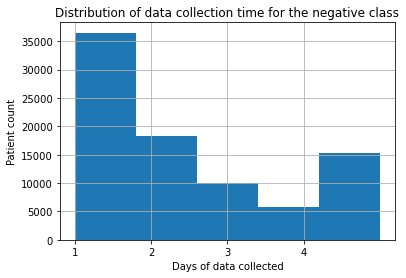

In [100]:
import numpy as np
import matplotlib.pyplot as plt
combined_neg['days_of_data'].hist(bins=5)
plt.xlabel('Days of data collected')
plt.ylabel('Patient count')
plt.xticks(np.arange(1, 5), ['1', '2', '3', '4', '5'])
plt.title('Distribution of data collection time for the negative class');

In [89]:
# process data for the positive label
lab_positive = pd.read_csv('../data/intermediate/positive_lab_summary_alldays.csv', header=None)
vital_positive = pd.read_csv('../data/intermediate/positive_vitalperiodic_alldays.csv', header=None)
lab_positive = cleaning_funcs.lab_process(lab_positive) 
vital_positive = cleaning_funcs.vital_process(vital_positive, '1-all')
print(len(lab_positive))
print(len(vital_positive))
combined_positive, _ = cleaning_funcs.merge_filter(lab_positive, vital_positive)
print(len(combined_positive))

2303
2314
2295


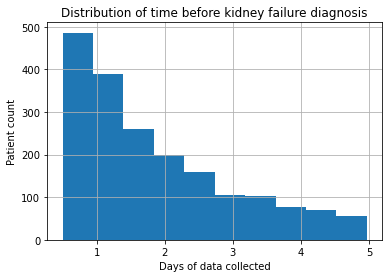

In [97]:
qa = pd.read_csv('../data/intermediate/patid_aki_label_offset.csv', header = None)
qa.columns = ['patientunitstayid', 'aki_label', 'aki_offset'] 
pos_data_offset = (qa[qa.aki_label==1].aki_offset/60-12)/24
pos_data_offset[pos_data_offset<=5].hist()
plt.xlabel('Days of data collected')
plt.ylabel('Patient count')
plt.title('Distribution of time before kidney failure diagnosis');

In [101]:
# concatenate positive and negative class data and write to csv
positive_negative_combined = pd.concat([combined_positive, combined_neg], axis=0)
positive_negative_combined.to_csv('../data/intermediate/lab_vital_merged_time.csv')